In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\feder\Documents\GitHub\relgan\src\jupyter_tests


In [2]:
os.chdir("..")
cwd = os.getcwd()
print(cwd)
assert cwd.endswith("src")

C:\Users\feder\Documents\GitHub\relgan\src


# Test on gumble softmax

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def add_gumbel(o_t, eps=1e-10):
    """
    Sample from Gumbel(0, 1)
    After some research and tests I discovered that it introdcues a noise with Final mean: 0.5862 and std: 1.29265
    This is a quite high std for that mean, and the added noise is high if compared to a softmax between 5k values
    that has mean of 0.0002!
    """
    u = np.random.uniform(size=o_t.shape)
    g_t = -np.log(-np.log(u + eps) + eps)
    gumbel_t = np.add(o_t, g_t)
    return gumbel_t

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def x_one_hot_appr(gumbel, temperature):
    return softmax(gumbel * temperature)

def do_gumble(o_t, temperature=1):
    gumbel = add_gumbel(o_t)
    return x_one_hot_appr(gumbel, temperature)

In [152]:
experiments = 100000
words = 5000
r = np.random.multinomial(experiments, [1/words]*words, size=1).squeeze() / experiments

mu, sigma = 2500, 200 
r = np.random.normal(mu, sigma, 1000)

In [150]:
r = r*100

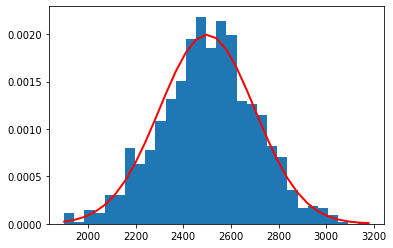

In [154]:
count, bins, ignored = plt.hist(r, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [155]:
count

array([1.17418465e-04, 2.34836929e-05, 1.40902158e-04, 1.17418465e-04,
       3.05288008e-04, 3.05288008e-04, 7.98445560e-04, 6.34059709e-04,
       7.74961867e-04, 1.08024988e-03, 1.31508680e-03, 1.50295635e-03,
       1.94914651e-03, 2.18398344e-03, 1.85521174e-03, 2.13701606e-03,
       1.99611390e-03, 1.29160311e-03, 1.26811942e-03, 1.15070095e-03,
       8.21929253e-04, 7.04510788e-04, 3.52255394e-04, 1.64385851e-04,
       1.87869544e-04, 1.64385851e-04, 9.39347718e-05, 2.34836929e-05,
       0.00000000e+00, 2.34836929e-05])

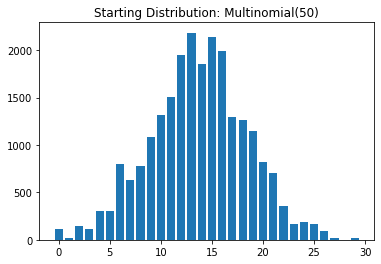

In [159]:
count = count * 100
plt.bar(range(len(count)), count)
plt.title("Starting Distribution: Multinomial(50)")
plt.show()

In [160]:
r = count

C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


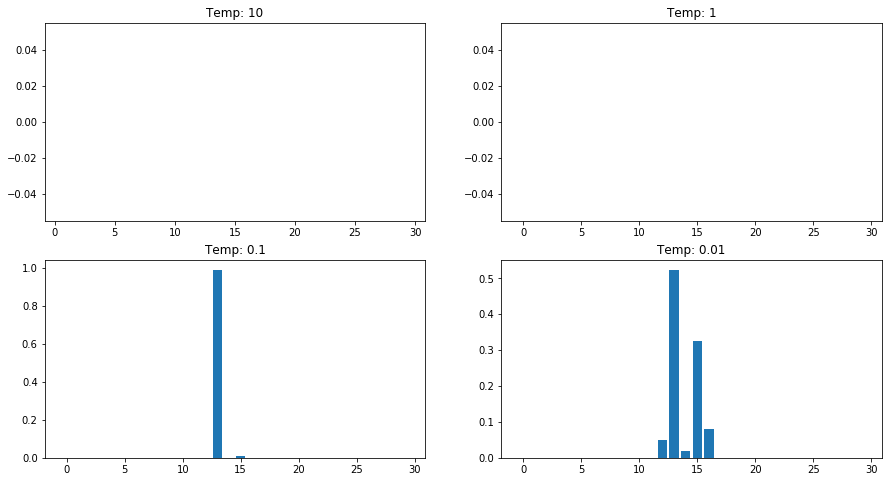

In [161]:
plt.figure(figsize=(15, 8))

temp = 10
plt.subplot(221)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

temp = 1
plt.subplot(222)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

temp = 0.1
plt.subplot(223)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

temp = 0.01
plt.subplot(224)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))
plt.show()

In [99]:
r = r * 100

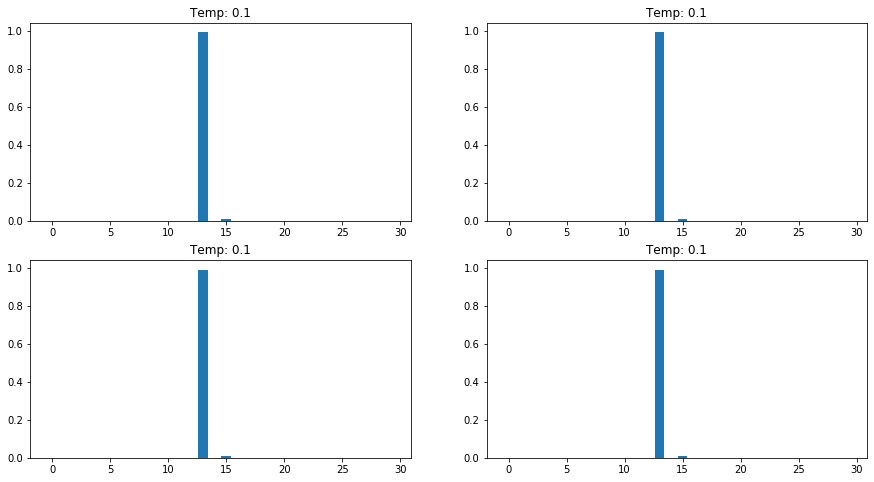

In [164]:
plt.figure(figsize=(15, 8))

temp = .1
plt.subplot(221)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

plt.subplot(222)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

plt.subplot(223)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

plt.subplot(224)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))
plt.show()

In [98]:
np.argsort(-do_gumble(r*100,1))

array([2583, 3767, 3518, ..., 3970, 3672, 4560], dtype=int64)

In [123]:
np.argsort(-do_gumble(r,10))

array([2175, 3129, 3978, ..., 3118, 4214, 4013], dtype=int64)